In [ ]:
# ------------------------------------------
# IMPORT AND SETUP
# ------------------------------------------

import sys, os
from pathlib import Path
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))) # This construct was reworked with the assistance of AI (DeepSeek) 

#Import the various classes from the src files
from data_import import RawData
raw_data = RawData()

from data_handling import RefinedData
ref_data = RefinedData()

from utils import VisualTable
pretty_table = VisualTable()

from analysis import AnalysedData
analysed_data = AnalysedData()

from graphs import Graphs
graphic_data = Graphs()

# ------------------------------------------
# VARIABLES
# ------------------------------------------
    
# Frost API Settings for retrieving weather data
FROST_API_CONFIG = {
    'station_id': 'SN68860',  # Weather station ID, can be multiple stations separated by a comma - 'SN68860' is Voll weatherstation
    'elements': 'mean(air_temperature P1D),sum(precipitation_amount P1D),mean(wind_speed P1D)', # The measurements to include in the dataset, here: temperautre, precipitation, and wind speed
    'time_range': '2014-11-07/2023-12-31',# The stretch of time to fetch weather data from
    'resolution': 'P1D' # The level of granularity in the weather data. P1D is once per day. P1H is once per hour.
}

# File paths
FILE_PATH = Path('../data/luftkvalitet_trondheim_dag.csv') #Using path/PathLib was suggested by AI (DeepSeek)

# Analysis threshold
UPTIME_THRESHOLD = 95 # Minimum uptime (%) for valid air quality data

# -- Variables for analysis and graphing
POLLUTANTS = ['NO', 'NO2', 'NOx', 'PM10', 'PM2.5'] # The columns that can be found in the air pollutant data
WEATHER_VARS = ['temperature (C)', 'wind_speed (m/s)', 'precipitation (mm)'] # The columns that can be found in the weather data

# Y-axis limits and alignment for weather plots: [temp (C), wind (m/s), precip (mm)]
WEATHER_Y_LIMS = [(-20, 30), (0, 20), (0, 100)] 
ZERO_ALIGN = [False, True, True] # Weather to align the 0 on both y-axis or not


In [13]:
# ------------------------------------------
# WEATHER DATA - IMPORT AND PROCESSING
# ------------------------------------------

# Run the module for importing the weather data, and save it to a dataframe
df_weather = raw_data.get_met(**FROST_API_CONFIG)

# The following block of code was generated by AI when the API was down temporarily
# Purpose: Generate sample weather data that enables the program to run if the API is down
# AI Tool: DeepSeek

# Temporary weather data for when the API is down
'''df_weather = pd.DataFrame({
    'referenceTime': ['2024-01-30', '2024-01-31', '2024-02-01'],
    'Temperature': [10, 15, 11],
    'Precipitation': [0, 5, 2],
    'Wind_Speed': [3, 7, 2]
})'''

# Check if data was fetched successfully and check for missing values
if df_weather is None:
    print("Failed to fetch weather data.")
else:
    # Report missing values as a dataframe
    missing_df = ref_data.missing_data(df_weather, strategy='report') #The 'strategy' variable was suggested by AI (DeepSeek)
    if missing_df is not None:
        print("Missing values found at these locations:")
        pretty_table.pretty_data(missing_df)

    # Fill missing values with chosen fill_value
    print('\nThe entire table of weather data:')
    filled_df = ref_data.missing_data(df_weather, strategy='fill', fill_value=np.nan)
    if filled_df is not None:
        pretty_table.pretty_data(filled_df)
        df_weather = filled_df
    else:
        pretty_table.pretty_data(df_weather)


# The following block of code was generated by AI to provide exploratory data analysis
# Purpose: Visualise and confirm that the program is behaving the way we expect
# AI Tool: DeepSeek

# Weather Data EDA
'''print("Weather Data Info:")
print(df_weather.info())
print("\nWeather Data Description:")
print(df_weather.describe())'''



Data collected from frost.met.no!
There are  3284 lines of data in this dataframe.

No missing values found in the data set! 


The entire table of weather data:
No missing values found in the data set! 



,Date,temperature (C),wind_speed (m/s),precipitation (mm)
0,2022-01-01,-1.0,1.7,0.7
1,2022-01-02,2.8,2.8,2.1
2,2022-01-03,0.9,1.4,0.0
3,2022-01-04,-6.0,1.4,3.0
4,2022-01-05,-4.0,1.9,0.7
5,2022-01-06,-5.3,2.2,2.3
6,2022-01-07,-5.7,2.2,0.6
7,2022-01-08,-4.2,1.5,0.1
8,2022-01-09,-1.7,2.9,0.0
9,2022-01-10,-1.8,2.1,0.0


'print("Weather Data Info:")\nprint(df_weather.info())\nprint("\nWeather Data Description:")\nprint(df_weather.describe())'

In [14]:
# ------------------------------------------
# AIR QUALITY DATA - IMPORT AND PROCESSING
# ------------------------------------------

# Run the module for importing the air quality data, and save it to a dataframe
df_quality = raw_data.get_nilu(UPTIME_THRESHOLD, FILE_PATH)

# Check if data was fetched successfully and check for missing values
if df_quality is None:
    print("Failed to fetch weather data.")
else:
    missing_data = ref_data.missing_data(df_quality)
    if missing_data is not None:
        print("\nThe following datapoints are missing:")
        pretty_table.pretty_data(missing_data)
    else:
        pass

# The following block of code was generated by AI to provide exploratory data analysis
# - Purpose: Visualise and confirm that the program is behaving the way we expect
# - AI Tool: DeepSeek

# Air Quality Data EDA
'''print("\nAir Quality Data Info:")
print(df_quality.info())
print("\nAir Quality Data Description:")
print(df_quality.describe())'''

# Displaying the air quality data as a table
print('\nThe entire table of air pollution data (pollutants are in µg/m³):')
pretty_table.pretty_data(df_quality)

Data collected from nilu.com!
There are 367 lines of data in this dataframe.


The following datapoints are missing:


,index,column
0,18,NO
1,18,NO2
2,18,NOx
3,18,PM10
4,18,PM2.5
5,29,PM10
6,29,PM2.5
7,50,NO
8,50,NO2
9,50,NOx



The entire table of air pollution data (pollutants are in µg/m³):


,Date,NO,NO2,NOx,PM10,PM2.5
0,2024-02-19,21.319116,47.910158,80.485768,11.695174,9.119713
1,2024-02-20,36.586944,48.447275,104.352126,20.795971,14.341274
2,2024-02-21,28.709966,43.229089,87.097916,11.257472,5.809501
3,2024-02-22,8.784671,16.795990,30.218967,4.780046,0.898309
4,2024-02-23,4.420641,11.082582,17.837321,1.219465,0.168885
5,2024-02-24,1.929630,7.355437,10.303912,2.444950,0.019941
6,2024-02-25,5.334206,17.168342,25.319009,15.155823,2.120134
7,2024-02-26,5.787199,22.636717,31.479558,6.123895,2.299517
8,2024-02-27,21.400212,30.552252,63.251776,18.657540,3.183995
9,2024-02-28,11.161719,27.314969,44.370076,33.852309,4.013046


In [15]:
# ------------------------------------------
# DATA AND PATTERN ANALYSIS
# ------------------------------------------

# Averages of weather data
df_average_weather = analysed_data.averages(df_weather, WEATHER_VARS)
print('\nTable of weekly averages for weather data:')
pretty_table.pretty_data(df_average_weather)

# Averages of air pollutant data
df_average_pollutants = analysed_data.averages(df_quality, POLLUTANTS)
print('\nTable of weekly averages for air pollution (pollutants are in µg/m³):')
pretty_table.pretty_data(df_average_pollutants)

# Standard deviations of weather data
weather_standard_deviation = analysed_data.standard_deviation(df_weather, WEATHER_VARS)
print('\nStandard deviation of weather data')
pretty_table.pretty_data(weather_standard_deviation)

# Standard deviations of air pollutant data
pollutants_standard_deviation = analysed_data.standard_deviation(df_quality, POLLUTANTS)
print('\nStandard deviation of air pollution data')
pretty_table.pretty_data(pollutants_standard_deviation)


Table of weekly averages for weather data:


,Date,temperature (C),wind_speed (m/s),precipitation (mm)
0,2022-01-01,-2.61,1.94,1.34
1,2022-01-08,1.23,4.61,6.03
2,2022-01-15,1.17,4.20,7.06
3,2022-01-22,2.60,3.40,5.30
4,2022-01-29,-1.44,2.53,3.40
5,2022-02-05,0.43,4.37,5.87
6,2022-02-12,-1.07,2.26,3.51
7,2022-02-19,-0.29,3.00,1.89
8,2022-02-26,2.17,3.07,1.89
9,2022-03-05,3.20,3.09,1.41



Table of weekly averages for air pollution (pollutants are in µg/m³):


,Date,NO,NO2,NOx,PM10,PM2.5
0,2024-02-19,15.30,27.43,50.80,9.62,4.64
1,2024-02-26,10.27,21.02,36.72,17.41,3.23
2,2024-03-04,11.65,23.11,40.91,33.03,6.21
3,2024-03-11,10.89,22.84,39.49,27.38,4.58
4,2024-03-18,7.04,17.74,28.50,27.82,3.65
5,2024-03-25,4.28,13.73,20.26,30.15,5.29
6,2024-04-01,4.10,11.13,17.40,30.25,4.80
7,2024-04-08,8.36,18.94,31.70,28.21,4.71
8,2024-04-15,4.99,14.31,21.93,38.37,4.88
9,2024-04-22,6.84,15.86,26.31,25.21,4.19



Standard deviation of weather data


,Metric,Standard Deviation
0,temperature (C),7.363523
1,wind_speed (m/s),1.141931
2,precipitation (mm),5.015455



Standard deviation of air pollution data


,Metric,Standard Deviation
0,NO,7.659718
1,NO2,8.501135
2,NOx,19.161601
3,PM10,12.750973
4,PM2.5,2.600037


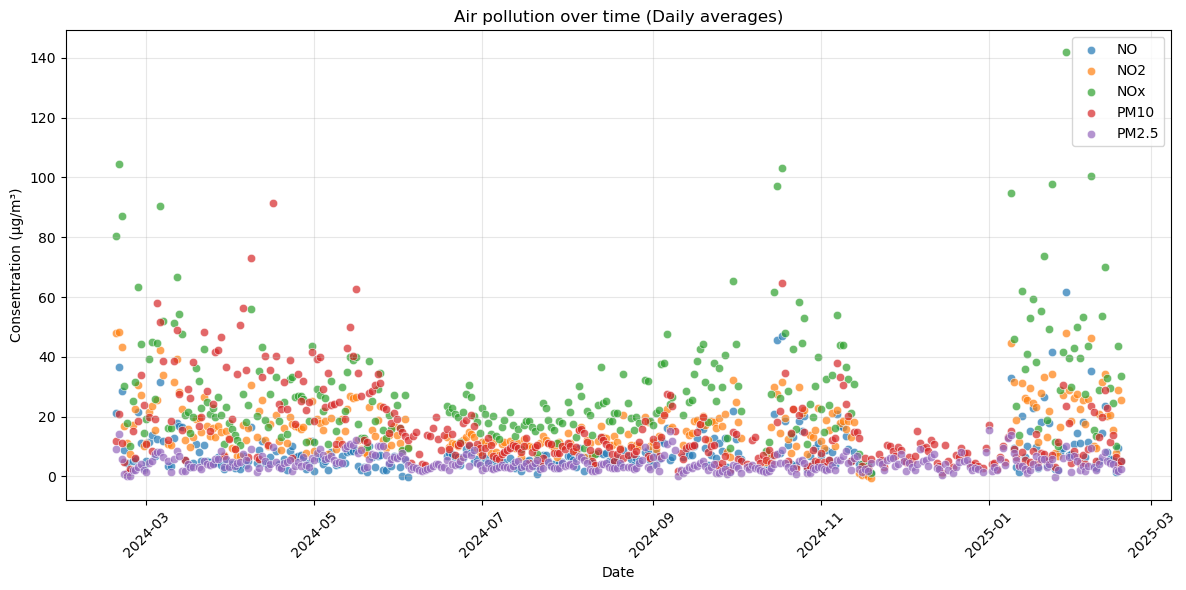

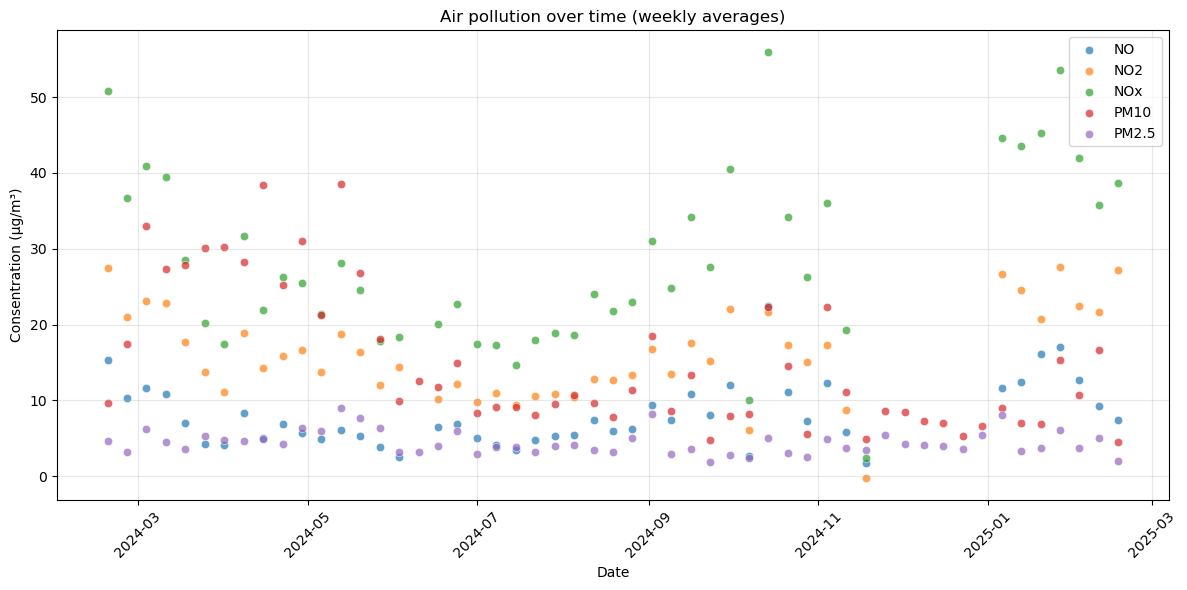

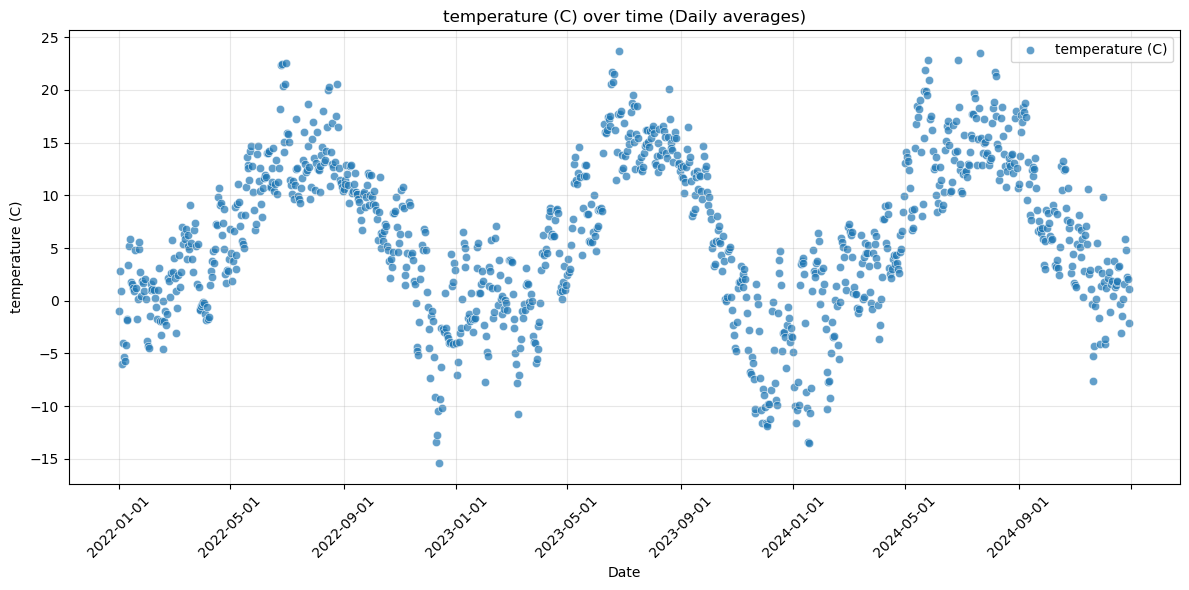

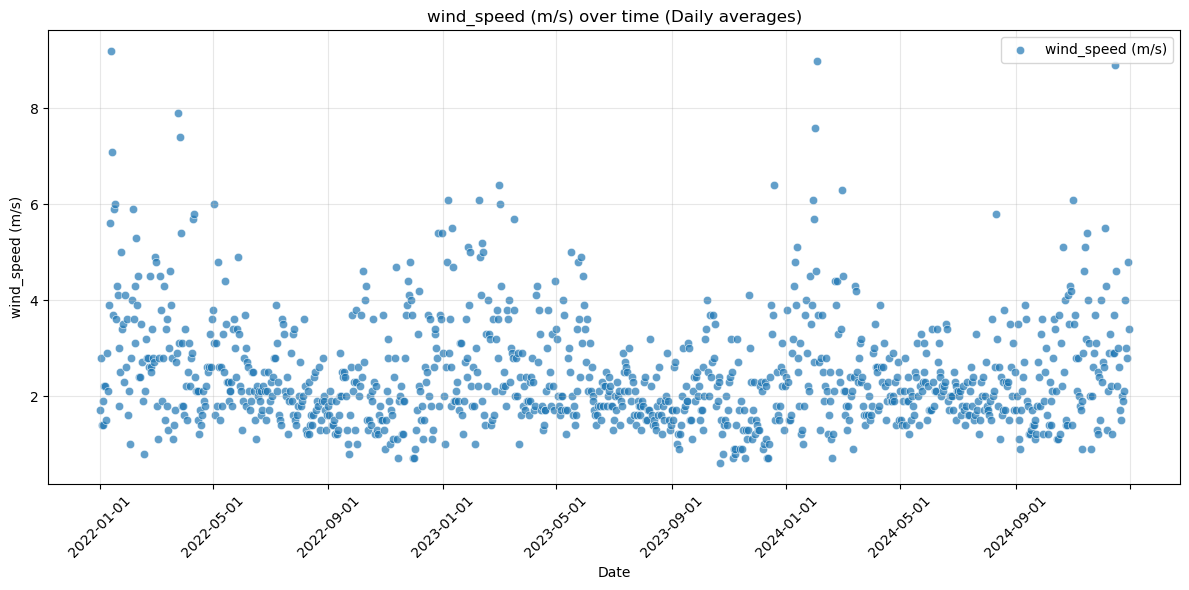

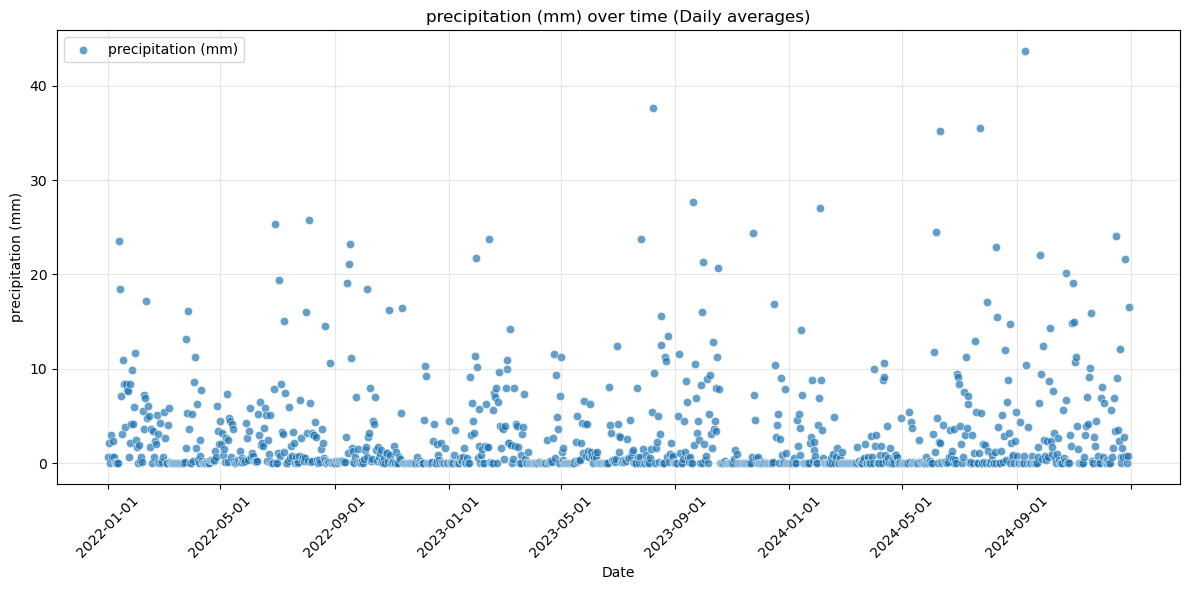

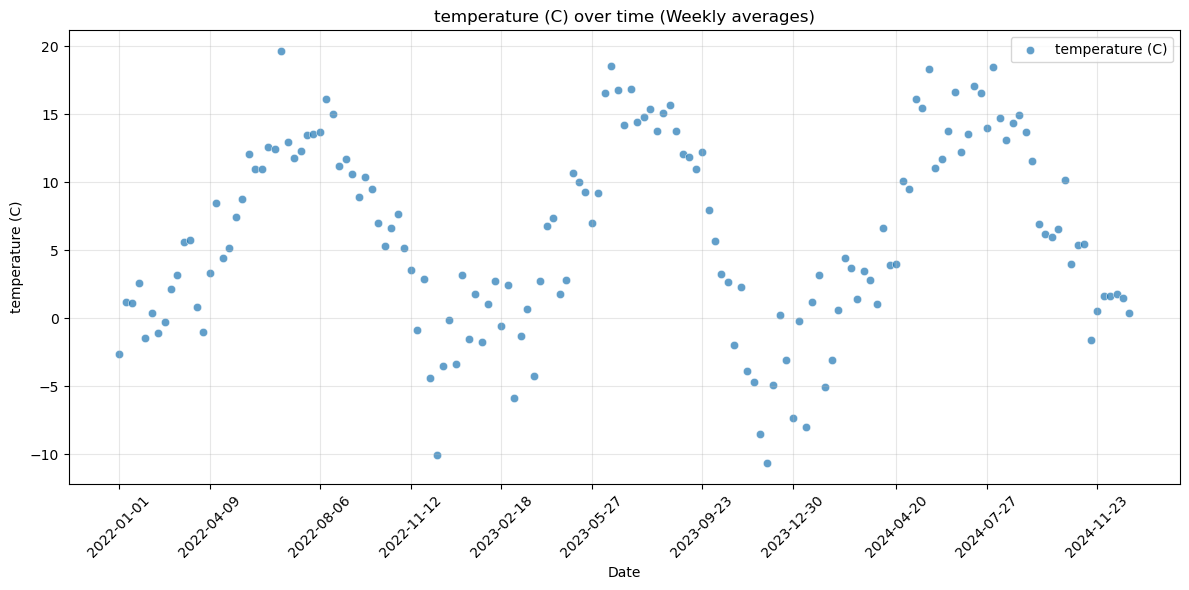

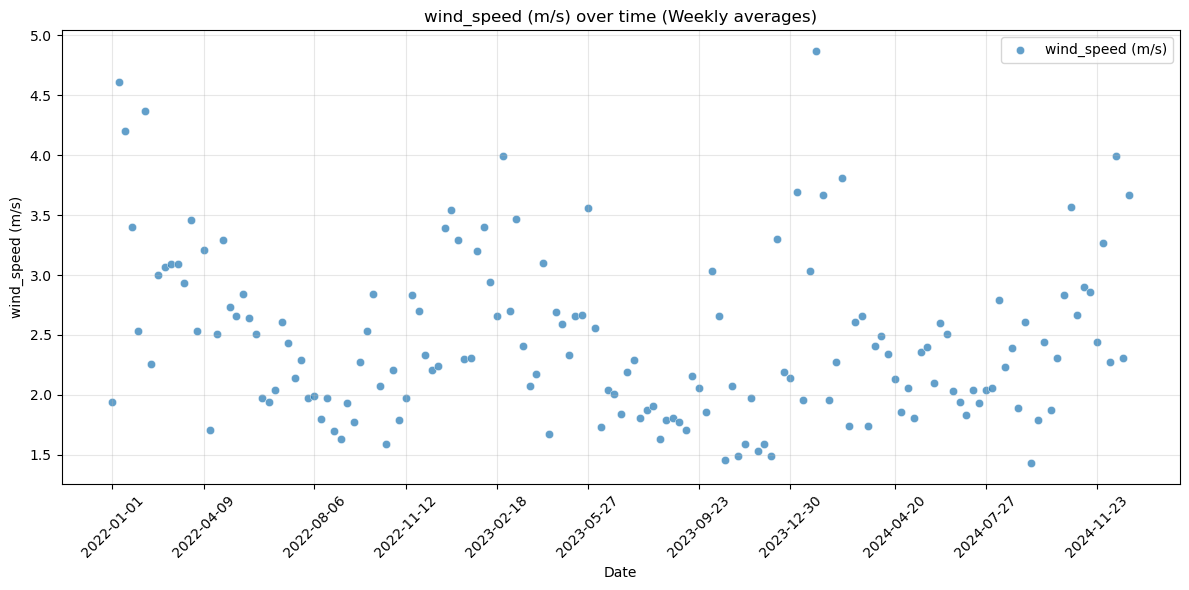

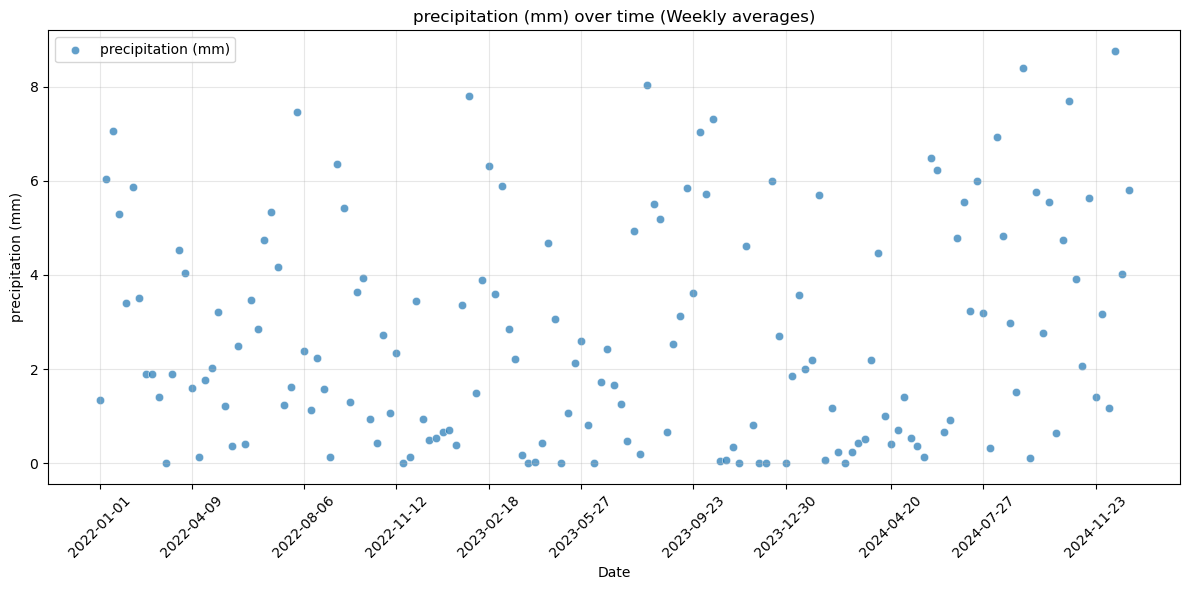

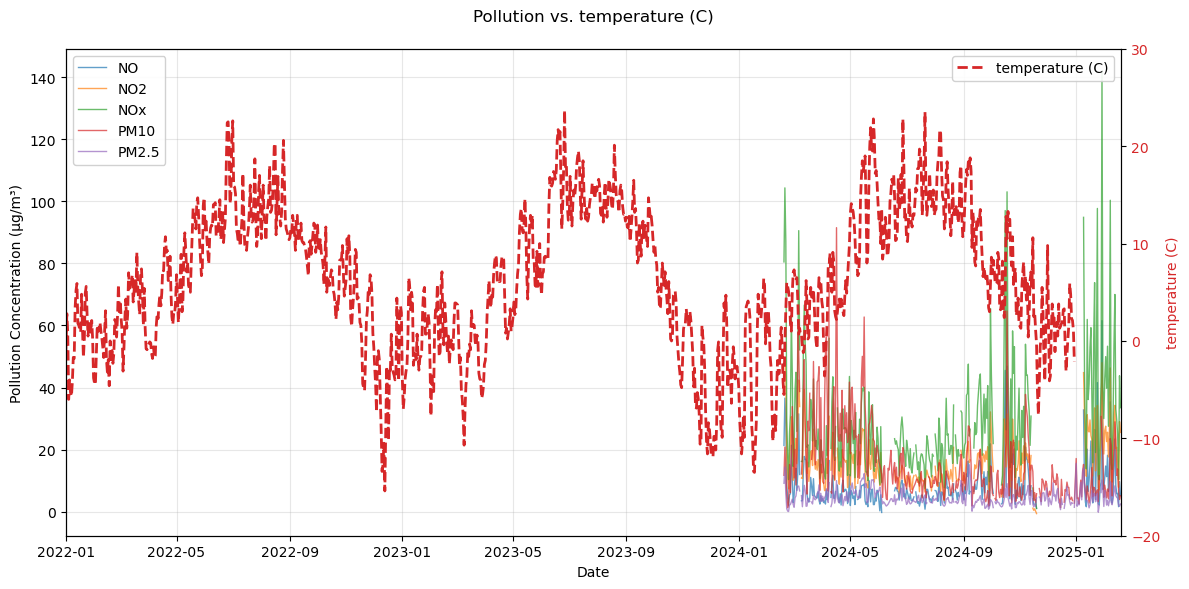

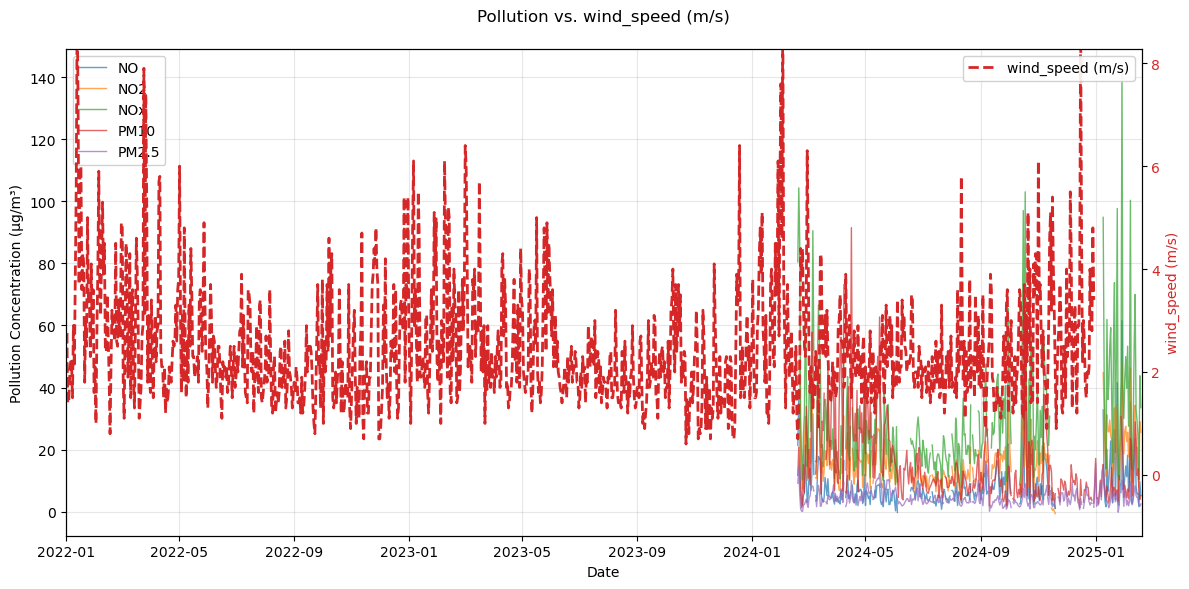

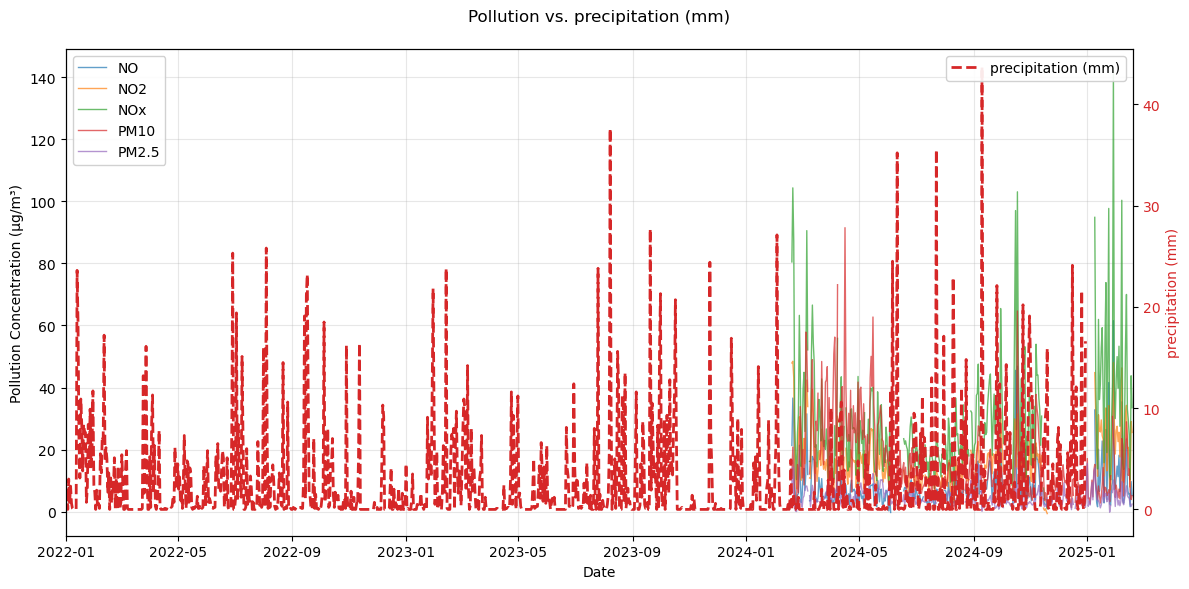

In [16]:
# ------------------------------------------
# DATA VISUALISATION AND GRAPHING
# ------------------------------------------

# Creating a sattergraph for the air quality data
graphic_data.dot_graph(df_quality, POLLUTANTS, 'Air pollution over time (Daily averages)', 'Date', 'Consentration (µg/m³)')

# Creating a scattergraph for weekly averages of air quality data
graphic_data.dot_graph(df_average_pollutants, POLLUTANTS, 'Air pollution over time (weekly averages)', 'Date', 'Consentration (µg/m³)')

# Creating a scattergraph for each of the the weather data variables
for column in WEATHER_VARS:
    graphic_data.dot_graph(
        df=df_weather,
        columns=[column],  # Pass as a list with 1 item to reuse function
        title=f'{column} over time (Daily averages)', 
        x_axis='Date',
        y_axis=column  
    )

# Creating a scattergraph for each of the the weather data variables for weekly averages
for column in WEATHER_VARS:
    graphic_data.dot_graph(
        df=df_average_weather,
        columns=[column],  # Pass as a list with 1 item to reuse function
        title=f'{column} over time (Weekly averages)', 
        x_axis='Date',
        y_axis=column  
    )

# Creating a comparative graph of air pollutants vs one weather data variable
for predictor, y_lim, should_align in zip(WEATHER_VARS, WEATHER_Y_LIMS, ZERO_ALIGN):
    graphic_data.comparative_graph(
        df=df_quality,
        columns=POLLUTANTS, 
        df_predictor=df_weather,
        predictor=predictor,
        title=f'Pollution vs. {predictor}',  
        x_axis='Date',
        y_axis='Pollution Concentration (µg/m³)',
        y_lims=y_lim,
        zero_align=should_align
    )

In [17]:
# ------------------------------------------
# INTERACTIVE DATA VISUALIZATION
# ------------------------------------------
import plotly.io as pio
pio.renderers.default = "notebook_connected" 

from graph_test import InteractiveGraphs
ig = InteractiveGraphs(weather_vars=WEATHER_VARS)

# Daily pollution (toggle pollutants)
ig.dot_graph(df_quality, POLLUTANTS, 'Air pollution (Daily)', 'Date', 'Concentration (µg/m³)')

# Weekly pollution (toggle pollutants)
ig.dot_graph(df_average_pollutants, POLLUTANTS, 'Air pollution (Weekly)', 'Date', 'Concentration (µg/m³)')

# Comparative graphs (now with dropdown)
ig.comparative_graph(
    df=df_quality,
    columns=POLLUTANTS,
    df_predictor=df_weather,
    predictor=WEATHER_VARS[0],  # Default to first variable
    title='Pollution vs Weather',
    x_axis='Date',
    y_axis='Pollution (µg/m³)',
    y_lims=WEATHER_Y_LIMS[0],  # Use first set of limits
    zero_align=ZERO_ALIGN[0]   # Use first alignment setting
)

In [18]:
# ------------------------------------------
# PREDICTIVE ANALYSIS
# ------------------------------------------

In [ ]:
# ------------------------------------------
# SAVE DATA TO FILE
# ------------------------------------------

# The following block of code was written with assistance from AI
# - Purpose: The function saves the reworked dataframes to a file. AI was used to pinpoint the correct folder location.
# - AI Tool: DeepSeek

#df_weather.to_csv('../data/refined_weather_data.csv', encoding='utf-8', index=False)
#df_quality.to_csv('../data/refined_air_qualty_data.csv', encoding='utf-8', index=False)
